# Querying the ag-analytics.org api 

The Ag-Analytics [API docs](https://www.ag-analytics.org/AgRiskManagement/APIdocs) show how to query their database using the urllib2 library which no longer works with python 3.  After some trials and Matt's saving suggestion here is a simple way to submit SQL queries and load the results to a pandas dataframe:

In [1]:
import requests
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, burr, gamma
from scipy.optimize import minimize
%matplotlib inline

In [2]:
def agquery(sql):
    '''function for making an sql query tha returns a pandas data frame with results'''
    url = 'https://ag-analytics.org/AgRiskManagement/api/dataservice/AgDBQuery'
    res = requests.post(url, data=sql)
    df = pd.read_csv(io.StringIO(res.text))
    return df

As an aside had we wanted to instead write the retrieved data to a CSV file we could have used this instead of loading the pandas dataframe:

    file = open("nasscrops.csv", "w")
    file.write(res.text) 
    file.close()

A sample query:

In [3]:
sql_query = "SELECT * FROM NassEconomics WHERE fips BETWEEN 17001 AND 17020 \
            AND Year = 2012 \
            AND SourceDesc = 'CENSUS' \
            AND CommodityDesc = 'AG LAND' "

dfr = agquery(sql_query)

In [4]:
len(dfr)

1104

In [5]:
dfr.columns

Index(['FIPS', 'SourceDesc', 'SectorDesc', 'GroupDesc', 'CommodityDesc',
       'ClassDesc', 'ProdnPracticeDesc', 'UtilPracticeDesc',
       'StatisticcatDesc', 'UnitDesc', 'ShortDesc', 'DomainDesc',
       'DomaincatDesc', 'AggLevelDesc', 'StateAnsi', 'StateFIPS', 'StateAlpha',
       'StateName', 'AsdCode', 'AsdDesc', 'CountyANSI', 'CountyFIPS',
       'CountyName', 'RegionDesc', 'ZIP5', 'WatershedCode', 'WatershedDesc',
       'CongrDistrictCode', 'CountryCode', 'CountryName', 'LocationDesc',
       'Year', 'FreqDesc', 'BeginCode', 'EndCode', 'ReferencePeriodDesc',
       'WeekEnding', 'LoadTime', 'Value', 'CVPercent'],
      dtype='object')

We've pulled in a lot of data, much of which we don't need. But here is one row that has useful data for the land distribution:

In [6]:
#dfr[(dfr.DomaincatDesc == 'AREA OPERATED: (1.0 TO 9.9 ACRES)')]

## Farm Size and Land Size distribution data

Here is a query that seems to get close to the farm size and land size distribution data. It's not yet sorted and presented exactly as we'd like, and remember this is for a single county, but almost there...

### Farm Size

In [7]:
query = (dfr.DomainDesc == 'AREA OPERATED') \
        & (dfr.ProdnPracticeDesc == 'ALL PRODUCTION PRACTICES') & (dfr.UnitDesc == 'OPERATIONS')
farm_size = dfr[query][['StateAlpha','CountyFIPS','CountyName', 'DomaincatDesc', 'Value']] 
farm_size.columns = ['state', 'FIPS', 'county','farmsizes', 'nfarms']
farm_size

,state,FIPS,county,farmsizes,nfarms
724,IL,11,BUREAU,AREA OPERATED: (2 000 OR MORE ACRES),33
725,IL,15,CARROLL,AREA OPERATED: (2 000 OR MORE ACRES),23
726,IL,7,BOONE,AREA OPERATED: (2 000 OR MORE ACRES),6
727,IL,1,ADAMS,AREA OPERATED: (2 000 OR MORE ACRES),27
728,IL,9,BROWN,AREA OPERATED: (2 000 OR MORE ACRES),11
729,IL,19,CHAMPAIGN,AREA OPERATED: (2 000 OR MORE ACRES),55
730,IL,5,BOND,AREA OPERATED: (2 000 OR MORE ACRES),24
731,IL,13,CALHOUN,AREA OPERATED: (2 000 OR MORE ACRES),2
732,IL,3,ALEXANDER,AREA OPERATED: (2 000 OR MORE ACRES),11
746,IL,17,CASS,AREA OPERATED: (2 000 OR MORE ACRES),17


Relabel the bin categories and sort

### Land Size

In [8]:
query = (dfr.DomainDesc == 'AREA OPERATED') \
        & (dfr.ProdnPracticeDesc == 'ALL PRODUCTION PRACTICES') & (dfr.UnitDesc == 'ACRES')
land_size = dfr[query][['CountyFIPS','DomaincatDesc', 'Value']]
land_size.columns = ['FIPS', 'farmsizes', 'acres']

In [9]:
lands = pd.merge(farm_size, land_size, on = ['FIPS', 'farmsizes'])

Let's use a dictionary to relabel those bin categories to something more readable:

In [10]:
di = {
 'AREA OPERATED: (1.0 TO 9.9 ACRES)': '   1 to   10 acres',
 'AREA OPERATED: (10.0 TO 49.9 ACRES)': '  10 to   50 acres',
 'AREA OPERATED: (50.0 TO 69.9 ACRES)': '  50 to   70 acres', 
 'AREA OPERATED: (70.0 TO 99.9 ACRES)': '  70 to  100 acres',   
 'AREA OPERATED: (100 TO 139 ACRES)': ' 100 to  140 acres',
 'AREA OPERATED: (140 TO 179 ACRES)': ' 140 to  180 acres',
 'AREA OPERATED: (180 TO 219 ACRES)': ' 180 to  220 acres',
 'AREA OPERATED: (220 TO 259 ACRES)': ' 220 to  260 acres',
 'AREA OPERATED: (260 TO 499 ACRES)': ' 260 to  500 acres',
 'AREA OPERATED: (500 TO 999 ACRES)': ' 500 to 1000 acres',
 'AREA OPERATED: (1 000 TO 1 999 ACRES)': '1000 to 2000 acres',
 'AREA OPERATED: (2 000 OR MORE ACRES)': '2000  or more acres'}

In [11]:
lands['farmsizes'].replace(di, inplace=True)

In [12]:
lands = lands.sort_values(by = ['FIPS', 'farmsizes']).reset_index(drop=True)

In [13]:
lands['pnfarms'] = 0
lands['pacres'] = 0

In [14]:
lands[['pnfarms']] = lands.groupby('FIPS')['nfarms'].apply(lambda x: x.cumsum()/sum(x))

In [15]:
lands[['pacres']] = lands.groupby('FIPS')['acres'].apply(lambda x: x.cumsum()/sum(x))

## Lorenz Plots

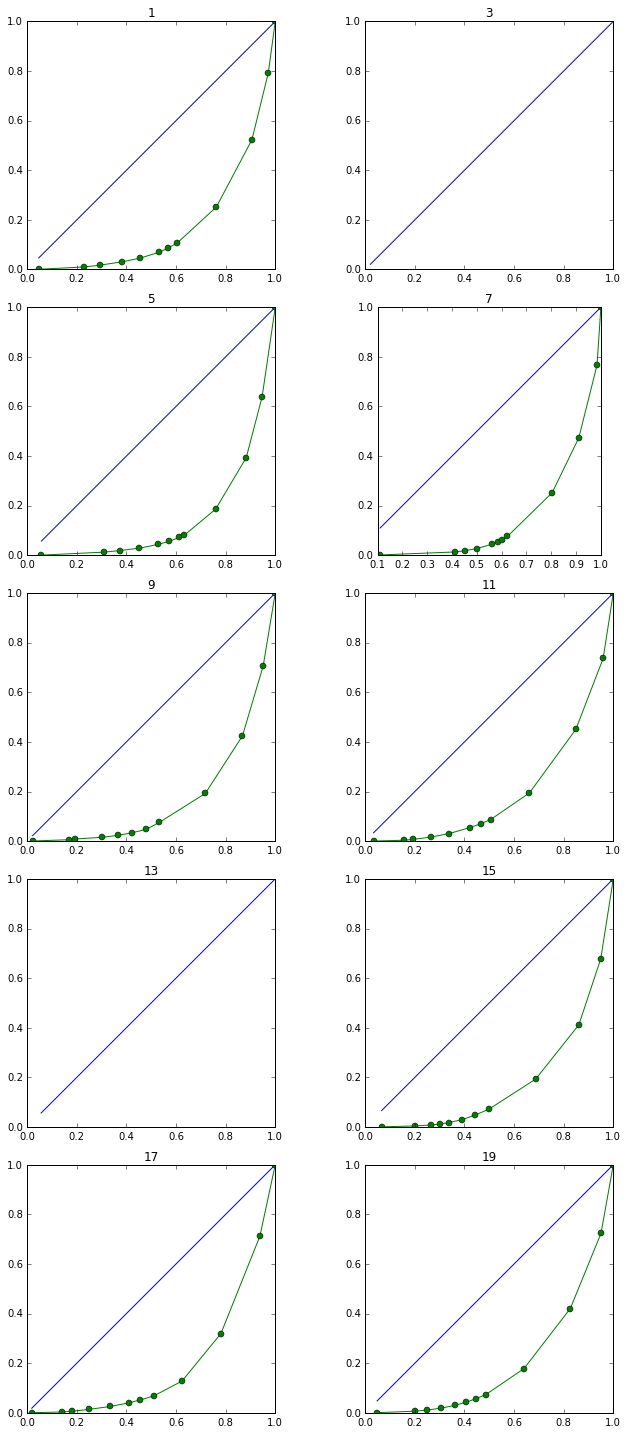

In [16]:
plt.figure(figsize =(10,20))
num_plots = len(lands.groupby('FIPS'))
ncols = 2
nrows = num_plots/ncols
plot_number = 1
for key, grp in lands.groupby('FIPS'):
    ax = plt.subplot(nrows,ncols, plot_number)
    plt.plot(grp.pnfarms, grp.pnfarms)
    plt.plot(grp.pnfarms, grp.pacres, marker = 'o')
    plt.gca().set_aspect('equal', adjustable='box')
    ax.set_title(key)
    plot_number = plot_number + 1
plt.tight_layout()

#### Gini coefficient from Lorenz data
 It's all about adding up trapezoids.  If $F_n$ are cumulative proportion of farms and $A_n$ are cumulative proportion of land area, then the area under the Lorenz curve $B$ is given by:

$$ B = \sum_{n=1}^{N} F_{n}\cdot A_{n-1} +\frac{1}{2} (F_n - F_{n-1}) \cdot (A_n - A_{n-1})$$ 

If the area below the diagonal and above the Lorenz curve is labeled $A$ then the Gini coefficient is given by 

$$G = \frac{A}{A+B}  = 1- 2 \cdot B$$

since $A+B = \frac{1}{2}$.

In [17]:
def gini(pfarms, pland):
    '''Land Gini from Lorenz curve data'''
    FT = np.array(pfarms[1:])
    FL = np.array(pfarms[0:-1])
    AT = np.array(pland[1:])
    AL = np.array(pland[0:-1])
    B = np.sum((FT-FL)*AL) + np.sum(0.5*(FT - FL)*(AT - AL)) 
    return 1 - 2*B 

In [18]:
for key, grp in lands.groupby('FIPS'):
    print('FIPS =  {:5.0f}    Gini = {:5.3f}'.format(key, gini(grp.pnfarms, grp.pacres)))

FIPS =      1    Gini = 0.660
FIPS =      3    Gini =   nan
FIPS =      5    Gini = 0.715
FIPS =      7    Gini = 0.725
FIPS =      9    Gini = 0.660
FIPS =     11    Gini = 0.609
FIPS =     13    Gini =   nan
FIPS =     15    Gini = 0.647
FIPS =     17    Gini = 0.618
FIPS =     19    Gini = 0.604


## Now let's fit the distribution

Similar to the distn_fit notebooks by Jonathan and Matt, let's try the MLE and GMM estimators.

First let's get the bin edges and bin frequencies the way we need them:

In [19]:
bins = np.array([1, 10, 50, 70, 100, 140, 180, 220, 260, 500, 1000, 2000])  

In [20]:
lands[['farm_pdf', 'land_pdf']] = lands[['nfarms', 'acres']].apply(lambda x: x/sum(x))

In [21]:
sum(lands.farm_pdf)

0.99999999999999989

### The gmm estimator

In [22]:
def mm_crit(parms, binFreq, binEdges):
    
    mu    = parms[0]
    sigma = parms[1]
    
    m = lognorm.cdf(binEdges[1:], s=sigma, scale=np.exp(mu)) - lognorm.cdf(binEdges[0:-1], s=sigma, scale=np.exp(mu))
    m = np.append(m, [1 - lognorm.cdf(binEdges[-1], s=sigma, scale=np.exp(mu))])
    
    moments = (m - binFreq)/binFreq
    
    return np.dot(moments, moments)

In [23]:
guess = np.array([5,2])
res = minimize(mm_crit, guess, args =(lands.farm_pdf, bins),  method ='Nelder-Mead')
print('Resulting parameter estimates are: ',res.x)

ValueError: operands could not be broadcast together with shapes (12,) (120,) 

### The MLE

In [ ]:
def binned_LL(params, binFreq, binEdges):
    
    mu    = params[0]
    sigma = params[1]
    
    m = lognorm.cdf(binEdges[1:], s=sigma, scale=np.exp(mu)) - lognorm.cdf(binEdges[0:-1], s=sigma, scale=np.exp(mu))
    m = np.append(m, [1 - lognorm.cdf(binEdges[-1], s=sigma, scale=np.exp(mu))])
    
    LL = binFreq * np.log(m)

    return -np.sum(LL)

In [ ]:
guess = np.array([5,2])
res = minimize(binned_LL, guess, args =(lands.farm_pdf, bins),  method ='Nelder-Mead')
print('Resulting parameter estimates are: ',res.x)

In [ ]:
mu = res.x[0]
sigma = res.x[1]

m = lognorm.cdf(bins[1:],  s=sigma, scale=np.exp(mu)) - lognorm.cdf(bins[0:-1], s=sigma, scale=np.exp(mu))
    
m = np.append(m, [1 - lognorm.cdf(bins[-1],  s=sigma, scale=np.exp(mu))])

n_groups = len(m)

fig, ax = plt.subplots()

index = np.arange(n_groups)

bar_width = 0.35
opacity = 0.4

error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, np.array(m), bar_width,
                 alpha=opacity,
                 color='b',
                 label='Model')

rects2 = plt.bar(index + bar_width, np.array(lands.farm_pdf), bar_width,
                 alpha=opacity,
                 color='r',
                 label='Data')

plt.tight_layout()

## fitted lognormal  vs. empirical pdf

I'm not sure this is right....

In [ ]:
rv  = lognorm(s=sigma, scale=np.exp(mu))

x = np.linspace(lognorm.ppf(0.01, sigma), lognorm.ppf(0.999999, sigma), 12)
plt.plot(x, rv.pdf(x)/sum(rv.pdf(x)))
plt.plot(x,lands.farm_pdf);

### not yet done ... Predicted Lorenz curve

From the fits above we have `m` which is the predicted frequencies in each bin.  We also need expeced farm size (i.e. how many hectares in each bin).  In the bin with edges $b_n$ to $b_{n+1}$ this should be:

$$\int_{b_n}^{b_{n+1}} x \cdot f(x) dx$$


I think we can implement this with the [.expect](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html) method...

```
lognorm.expect(lambda x: (x), ...
```

or else more simply as a midpoint land size value times the frequency (although then less what to do for the last bin which has acres >2000)


## Further documentation
Here is a long listing of the categories for each column.

In [ ]:
for col in dfr.columns:
    print(col, ': ', dfr[col].unique())
    print()

### State Level Data
### IOWA

In [24]:
sql_queryIA = "SELECT * FROM NassEconomics WHERE StateName = 'IOWA' AND Year = 2012 \
                  AND SourceDesc = 'CENSUS' AND CommodityDesc = 'AG LAND' "
dfr_IA = agquery(sql_queryIA)
dfr_IA.shape

(13285, 40)

### Farm size

In [25]:
IA_qry = (dfr_IA.DomainDesc == 'AREA OPERATED') & (dfr_IA.ProdnPracticeDesc == 'ALL PRODUCTION PRACTICES') \
        & (dfr_IA.UnitDesc == 'OPERATIONS')
fmsz_IA = dfr_IA[IA_qry][['StateAlpha', 'CountyFIPS', 'CountyName', 'DomaincatDesc', 'Value']]
fmsz_IA.columns = ['state', 'FIPS', 'county', 'farmsizes', 'nfarms']
fmsz_IA.head(n=6)

,state,FIPS,county,farmsizes,nfarms
7230,IA,65,FAYETTE,AREA OPERATED: (500 TO 999 ACRES),145
7231,IA,89,HOWARD,AREA OPERATED: (500 TO 999 ACRES),95
7232,IA,191,WINNESHIEK,AREA OPERATED: (500 TO 999 ACRES),162
7242,IA,3,ADAMS,AREA OPERATED: (500 TO 999 ACRES),65
7243,IA,29,CASS,AREA OPERATED: (500 TO 999 ACRES),106
7253,IA,NaN,NaN,AREA OPERATED: (1 000 TO 1 999 ACRES),6531


### Land Size

In [26]:
IA_qry = (dfr_IA.DomainDesc == 'AREA OPERATED') & (dfr_IA.ProdnPracticeDesc == 'ALL PRODUCTION PRACTICES') \
        & (dfr_IA.UnitDesc == 'ACRES')
ldsz_IA = dfr_IA[IA_qry][['CountyFIPS', 'DomaincatDesc', 'Value']]
ldsz_IA.columns = ['FIPS', 'farmsizes', 'acres']
ldsz_IA.head(n=6)

,FIPS,farmsizes,acres
7042,187,AREA OPERATED: (500 TO 999 ACRES),97699
7043,11,AREA OPERATED: (500 TO 999 ACRES),109754
7044,31,AREA OPERATED: (500 TO 999 ACRES),66593
7045,45,AREA OPERATED: (500 TO 999 ACRES),120870
7046,95,AREA OPERATED: (500 TO 999 ACRES),52580
7047,97,AREA OPERATED: (500 TO 999 ACRES),49809


In [27]:
lands = pd.merge(fmsz_IA, ldsz_IA, on = ['FIPS', 'farmsizes'])
lands.head(n=3)

,state,FIPS,county,farmsizes,nfarms,acres
0,IA,65,FAYETTE,AREA OPERATED: (500 TO 999 ACRES),145,92557
1,IA,89,HOWARD,AREA OPERATED: (500 TO 999 ACRES),95,60442
2,IA,191,WINNESHIEK,AREA OPERATED: (500 TO 999 ACRES),162,91599


In [28]:
di = {
       'AREA OPERATED: (1.0 TO 9.9 ACRES)':'1 to 10 acres',
       'AREA OPERATED: (10.0 TO 49.9 ACRES)':'10 to 50 acres',
       'AREA OPERATED: (50.0 TO 69.9 ACRES)':'50 to 70 acres',
       'AREA OPERATED: (70.0 TO 99.9 ACRES)':'70 to 100 acres',
       'AREA OPERATED: (100 TO 139 ACRES)':'100 to 140 acres',
       'AREA OPERATED: (140 TO 179 ACRES)' : '140 to 180 acres',
       'AREA OPERATED: (180 TO 219 ACRES)': '180 to 220 acres',
       'AREA OPERATED: (220 TO 259 ACRES)':'220 to 260 acres',
       'AREA OPERATED: (260 TO 499 ACRES)':'260 to 500 acres',
       'AREA OPERATED: (500 TO 999 ACRES)':'500 to 1000 acres',
       'AREA OPERATED: (1 000 TO 1 999 ACRES)':'1000 to 2000 acres',
       'AREA OPERATED: (2 000 OR MORE ACRES)':'2000 to 5000 acres',
       'AREA OPERATED: (2 000 TO 4 999 ACRES)':'2000 to 5000 acres',
       'AREA OPERATED: (5 000 OR MORE ACRES)':'5000 or more acres'   
}

In [29]:
lands['farmsizes'].replace(di, inplace = True)

In [30]:
lands=lands.sort_values(by = 'farmsizes').reset_index(drop = True)

In [31]:
lands[['pnfarms', 'pacres']] = lands[['nfarms', 'acres']].apply(lambda x: x.cumsum()/np.nansum(x))
lands.tail(n=6)

,state,FIPS,county,farmsizes,nfarms,acres,pnfarms,pacres
2680,IA,71,FREMONT,70 to 100 acres,17,886,0.999955,0.999987
2681,IA,129,MILLS,70 to 100 acres,18,825,0.999959,0.999988
2682,IA,137,MONTGOMERY,70 to 100 acres,22,1101,0.999964,0.999989
2683,IA,155,POTTAWATTAMIE,70 to 100 acres,48,2741,0.999975,0.999993
2684,IA,97,JACKSON,70 to 100 acres,71,2945,0.999991,0.999997
2685,IA,145,PAGE,70 to 100 acres,38,1938,1.000000,1.000000


### Lorenz Plots

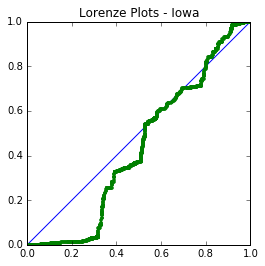

In [32]:
plt.plot(lands.pnfarms, lands.pnfarms)
plt.plot(lands.pnfarms, lands.pacres, marker = '.')
plt.gca().set_aspect('equal', adjustable = 'box')
plt.title('Lorenze Plots - Iowa')
plt.show();

### Calculate the Gini coefficient

In [35]:
def gini(pfarms, pland):
    ft = np.array(pfarms[1:])
    fl = np.array(pfarms[:-1])
    at = np.array(pland[1:])
    al = np.array(pland[:-1])
    B = np.nansum((ft-fl)*al) + np.nansum(0.5*(ft-fl)*(at-al))
    return 1 - 2*B

gini(lands.pnfarms, lands.pacres)

0.23544126153004585

###  Try to fit the distribution

In [36]:
bins = np.array([0, 10, 50, 70, 100, 140, 180, 220, 260, 500,1000, 2000, 5000])

In [37]:
lands[['farm_pdf', 'land_pdf']] = lands[['nfarms', 'acres']].apply(lambda x: x/np.nansum(x))

### GMM

In [38]:
m=lognorm.cdf(bins[1:], s=2, scale=np.exp(5)) - lognorm.cdf(bins[:-1], s=2, scale=np.exp(5))
m=np.append(m, [1-lognorm.cdf(bins[-1], s=2, scale=np.exp(5))])

In [39]:
m.shape

(13,)

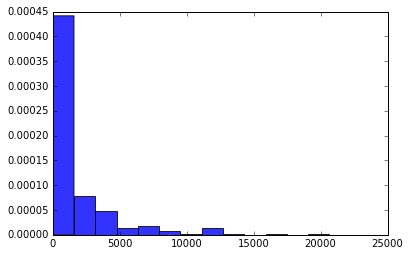

In [40]:
(counts, bins2, patches) = plt.hist(lands.nfarms, bins=13, normed=True, alpha = 0.8, color = 'blue')

In [41]:
def gmm_crit(parms, binFreq, binEdges):
    mu      = parms[0]
    sigma   = parms[1]
    
    m       = lognorm.cdf(binEdges[1:], s=sigma, scale=np.exp(mu)) - lognorm.cdf(binEdges[0:-1], s=sigma, scale=np.exp(mu))
    m       = np.append(m, [1 - lognorm.cdf(binEdges[-1], s=sigma, scale=np.exp(mu))])
    
    moments = (m - binFreq)/binFreq
    return np.dot(moments, moments)

In [42]:
guess = np.array([6,2])
res = minimize(gmm_crit, guess, args = (counts, bins), method = 'Powell') # if use 'Nelder-Mead' would fail.
print('Resulting parameter estimates are: ',res.x)

Resulting parameter estimates are:  [ 213.03431692  209.03431692]


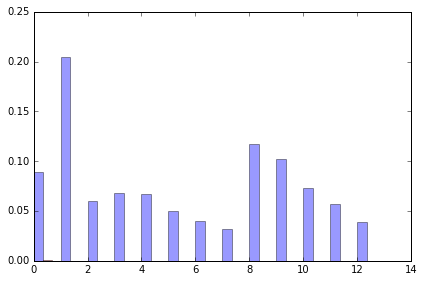

In [43]:
mu = res.x[0]
sigma = res.x[1]

n_groups = len(m)

fig, ax = plt.subplots()

index = np.arange(n_groups)

bar_width = 0.35
opacity = 0.4

error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, np.array(m), bar_width,
                 alpha=opacity,
                 color='b',
                 label='Model')

rects2 = plt.bar(index + bar_width, np.array(counts), bar_width, 
                 alpha=opacity,
                 color='r',
                 label='Data')

plt.tight_layout()   # sum(counts)!=1, they are much less than 'm' so that we cannot see 'counts' in the graph below